In [1]:
%matplotlib inline
from matplotlib.pyplot import *
from math import *
from numpy import *
from numpy.random import *
from scipy.misc import *

# Chapitre 3 : Introduction aux chaînes de Markov

## Quelques exemples de chaines de Markov

### 1) Une fourmi se déplace sur un cube ...

On considère une fourmi qui peut se déplacer aux quatre sommets d'un cube notés ici $1$, $2$, $3$, $4$ avec la matrice de transition suivante 


$$\left( \begin{array}{cccc}
0 & 1/2 & 0 & 1/2 \\
1/3 & 0 & 1/3 & 1/3 \\
0 & 1/2 & 0 & 1/2 \\ 
1/3 & 1/3 & 1/3 & 0 \end{array} \right)$$

[1, 2, 1, 2, 3, 2, 1, 4, 3, 2, 3, 2, 4, 2, 1, 4, 2, 4, 1, 4, 1, 4, 3, 2, 1, 4, 3, 2, 4, 3, 2, 1, 4, 1, 2, 3, 2, 4, 1, 4, 1, 2, 4, 3, 4, 2, 1, 4, 3, 4, 1, 4, 1, 2, 4, 2, 3, 4, 1, 4, 3, 4, 2, 3, 4, 3, 4, 3, 2, 3, 4, 1, 4, 2, 1, 2, 4, 2, 3, 2, 4, 1, 2, 3, 2, 1, 4, 3, 4, 3, 2, 1, 2, 1, 2, 3, 2, 1, 4, 3, 4]


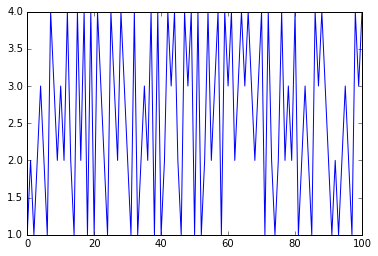

In [3]:
n=100;
X=range(1,n+2);
X[0]=1;
Q=array([(0.,0.5,0.,0.5),
   (1./3,0,1./3,1./3),
   (0.,0.5,0.,0.5),
   (1./3,1./3,1./3,0.)])
for k in arange(n):
    prob=cumsum(Q[X[k]-1])
    U=rand(1,1)
    if U<prob[0]: 
        X[k+1]=1
    elif U<prob[1]:
        X[k+1]=2
    elif U<prob[2]:
        X[k+1]=3
    else : 
        X[k+1]=4
print(X)
plot(X)

### 2) Modèle de Wright-Fisher


[10, 5, 4, 5, 6, 7, 3, 4, 4, 3, 3, 3, 2, 5, 6, 5, 4, 3, 5, 3, 2, 1, 2, 2, 2, 5, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


[0, 50, 0, 20]

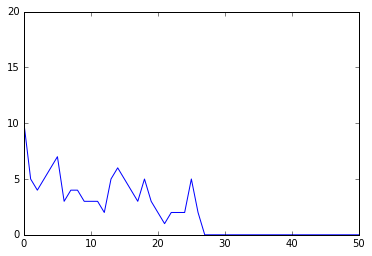

In [7]:
# Fonction pour simuler une loi binomiale
def binom(n,p):
    return( sum(rand(1,n)<p))

# Simulation de la chaine
N=20;
n=50;
X=range(1,n+2);
X[0]=10;
for k in arange(n):
    X[k+1]=binom(N,float(X[k])/N)
print(X)
plot(X)
axis([0,n,0,N])

### 3) Chaine D'Ehrenfest

On considère les mouvements de $m\ge2$ molécules entre 2 compartiments. Entre chaque pas de temps, on suppose qu'une molécule tirée au hasard change de compartiment.On note $X_n$ le nombre de molécule dans le premier compartiment au $n^{ième}$ pas de temps. C'est une chaine de Markov de transitions 

$$\begin{array}{ccc}
n \mapsto n+1 &\text{avec probabilité} &\frac{m-n}{m}\\
n \mapsto n-1 & \text{avec probabilité} &\frac{n}{m}\\
\end{array}$$

[1, 2, 3, 4, 5, 4, 3, 4, 5, 6, 5, 6, 7, 8, 9, 10, 9, 10, 11, 10, 9, 8, 7, 8, 9, 8, 7, 8, 7, 8, 9, 10, 9, 10, 11, 12, 11, 10, 9, 10, 9, 8, 7, 8, 9, 8, 7, 8, 9, 10, 11, 12, 11, 12, 13, 14, 15, 14, 13, 12, 11, 12, 11, 12, 11, 12, 11, 12, 13, 12, 13, 14, 15, 14, 13, 12, 11, 10, 9, 10, 9, 10, 9, 8, 9, 8, 7, 8, 7, 8, 9, 8, 9, 8, 9, 8, 7, 8, 9, 8, 7, 6, 7, 6, 5, 6, 5, 6, 7, 8, 9, 8, 9, 8, 9, 8, 7, 6, 5, 6, 7, 6, 7, 8, 9, 10, 9, 10, 9, 8, 9, 10, 9, 10, 11, 12, 11, 12, 11, 10, 9, 10, 11, 12, 11, 10, 11, 10, 11, 10, 11, 10, 9, 10, 11, 10, 11, 10, 9, 10, 11, 10, 11, 10, 9, 10, 11, 10, 11, 12, 13, 12, 11, 10, 11, 12, 11, 10, 11, 10, 9, 10, 9, 8, 7, 8, 7, 6, 7, 8, 9, 8, 9, 8, 9, 8, 7, 8, 9, 10, 9, 10, 11, 10, 9, 8, 9, 10, 11, 10, 11, 10, 9, 10, 11, 12, 11, 10, 9, 8, 9, 10, 11, 12, 13, 12, 13, 12, 13, 14, 13, 14, 13, 12, 11, 10, 9, 10, 11, 10, 9, 10, 9, 8, 7, 8, 7, 6, 7, 6, 5, 6, 7, 8, 7, 8, 9, 8, 7, 8, 7, 8, 7, 8, 9, 10, 9, 8, 9, 10, 9, 10, 11, 12, 13, 12, 13, 12, 13, 12, 13, 12, 13, 12, 11, 12, 13

[0, 3000, 0, 20]

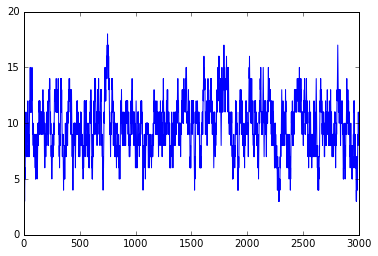

In [10]:
m=20
n=3000
X=range(1,n+2);
X[0]=1;
for k in arange(n):
    U=rand(1,1)
    if (U< float(X[k])/m): 
        X[k+1]=X[k]-1
    else : 
        X[k+1]=X[k]+1
print(X)
plot(X)
axis([0,n,0,m])